# Exercise 3 - Surface wind stress

## Import the required packages

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import warnings
warnings.filterwarnings('ignore')

## Load the temporal mean data

In [86]:
fn = xr.open_dataset('ERAinterim_taux.nc')
fn_mask = xr.open_dataset('ERAinterim_landseamask.nc')   # needed to mask out the continents
taux = fn.taux.mean(axis=0).values                       # load the temporally averages zonal wind stress
mask = np.logical_not(fn_mask.lsm[0,:,:].values)*1.      # set the mask to 0 over continents, 1 elsewhere
mask[mask==0]=np.NaN                                     # replace the 0s over the continents by NaNs

## Define the zonal wind stress variable and the corresponding coordinates.

In [87]:
taux = taux*mask    # zonal wind stress 
lat = fn.lat.values  # longitude
lon = fn.lon.values  # latitude

## Plot the surface zonal wind stress.

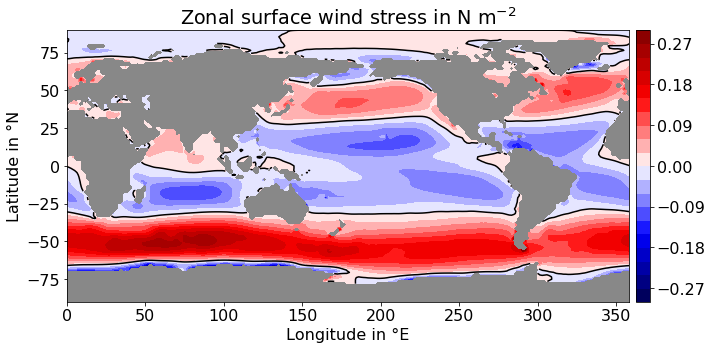

In [88]:
plt.rcParams['font.size']=16                   # set the fontsize used in the figure
fig,ax = plt.subplots(figsize=(12,5))          # setup the figure called fig with one axis inside. this axis can be reached through "ax"
ax.set_facecolor('#888888')                    # set the plot background color to grey
c0 = ax.contourf(lon,lat,taux,levels=np.linspace(-0.3,0.3,21),cmap='seismic')   # plot the zonal surface wind stress
c1 = ax.contour(lon,lat,taux,[0],colors='k')   # indicate the isoline where the zonal wind stress is 0
ax.set_xlabel('Longitude in °E')                # set the x label
ax.set_ylabel('Latitude in °N')                 # set the y label
ax.set_title('Zonal surface wind stress in N m$^{-2}$')    # set the title
plt.colorbar(c0,pad=0.01)       # set the colorbar for the plotted field with the handle c0 (-> i.e. the contourf representation of the zonal wind stress)
plt.show()   # show the figure

## 3d) Calculate and plot a global map of the zonal wind speed at 10m height using a roughness length of z$_0$ = 0.0002 and an air density of 1.25 kg/m$^3$. 

The devision, multiplication, addition and subtraction operators are "/", "*", "+" and "-" respectively.
Furthermore, the functions np.sqrt(), np.sign(), np.log(), and np.abs() will be helpful for solving this part. You can get the help for these functions by typing e.g. "np.sqrt?"
To calculate a power, e.g. 3$^2$ = 9, you need to use the double asterisk (i.e. 3***2).

In [89]:
### HERE DEFINE THE VARIABLES NEEDED
z = 10 # the height at which we want to calculate the wind speed
rho = 1.25 # kg/m-3
z0 = 0.0002  # the roughness length
kappa = 0.41  # van Karman constant

In [90]:
### HERE CALCULATE THE ZONAL WIND SPEED AT 10 m HEIGHT
c10 = (kappa/np.log(z/z0))**2     # calculate the drag coefficient 
u10 = np.sign(taux)*np.sqrt(np.abs(taux)/rho/c10) # calculate u10 using the formula u10 = sqrt(tau/(rho*c10))

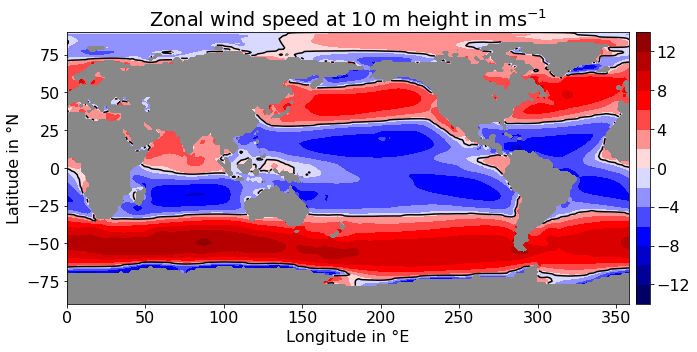

In [91]:
### HERE MAKE A PLOT OF THE ZONAL WIND SPEED AT 10 m HEIGHT (same as above, but replace mean_taux with u10)
plt.rcParams['font.size']=16
fig,ax = plt.subplots(figsize=(12,5))
ax.set_facecolor('#888888')
c0 = ax.contourf(lon,lat,u10,levels=np.linspace(-14,14,15),cmap='seismic')
c1 = ax.contour(lon,lat,u10,[0],colors='k')
ax.set_xlabel('Longitude in °E')
ax.set_ylabel('Latitude in °N')
ax.set_title('Zonal wind speed at 10 m height in ms$^{-1}$')
plt.colorbar(c0,pad=0.01)
plt.show()